<a href="https://colab.research.google.com/github/NeonLabs146/Neural-network/blob/main/Curse_of_Dimensionality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Understanding how distance behavior changes in higher dimensions**

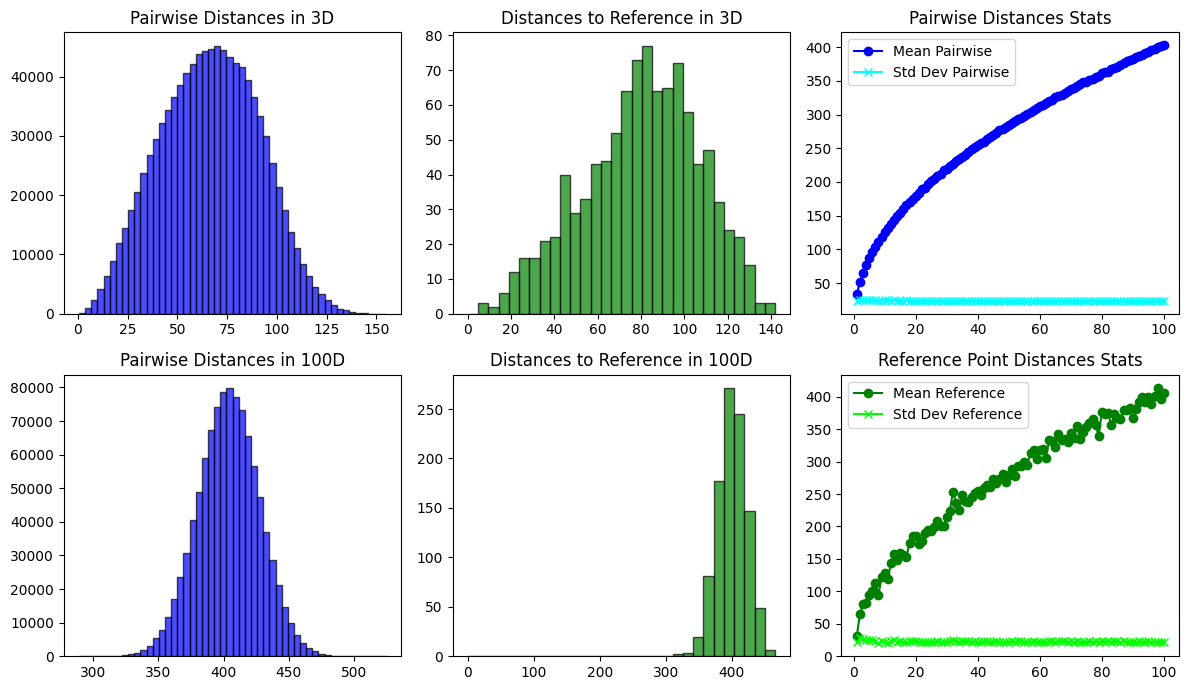

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist

def generate_points(dimensions, num_points, range_min, range_max):
    return np.random.uniform(range_min, range_max, (num_points, dimensions))

def calculate_pairwise_distances(points):
    distances = np.sqrt(((points[:, np.newaxis, :] - points[np.newaxis, :, :]) ** 2).sum(axis=-1))
    np.fill_diagonal(distances, np.nan)  # Ignore self-distances by setting them to NaN
    return distances

def calculate_distances_from_reference(points, reference_point):
    distances = np.sqrt(((points - reference_point) ** 2).sum(axis=1))
    return distances

def calculate_stats_for_dimensions(num_points, dimensions_range, range_min, range_max):
    means_pairwise = []
    stds_pairwise = []
    means_ref = []
    stds_ref = []

    for dim in dimensions_range:
        points = generate_points(dim, num_points, range_min, range_max)
        pairwise_distances = calculate_pairwise_distances(points)
        reference_point = generate_points(dim, 1, range_min, range_max)
        distances_from_ref = calculate_distances_from_reference(points, reference_point)

        means_pairwise.append(np.nanmean(pairwise_distances))
        stds_pairwise.append(np.nanstd(pairwise_distances))
        means_ref.append(np.mean(distances_from_ref))
        stds_ref.append(np.std(distances_from_ref))

    return means_pairwise, stds_pairwise, means_ref, stds_ref

def plot_histograms_and_stats(num_points, dimensions_range, range_min, range_max):
    fig, axs = plt.subplots(2, 3, figsize=(12, 7), tight_layout=True)

    # Plotting histograms for 3D and 100D
    for i, dim in enumerate([3, 100]):
        points = generate_points(dim, num_points, range_min, range_max)
        pairwise_distances = calculate_pairwise_distances(points)
        reference_point = generate_points(dim, 1, range_min, range_max)
        distances_from_ref = calculate_distances_from_reference(points, reference_point)

        axs[i, 0].hist(pairwise_distances[~np.isnan(pairwise_distances)], bins=50, alpha=0.7, color='blue', edgecolor='black')
        axs[i, 0].set_title(f'Pairwise Distances in {dim}D')
        axs[i, 1].hist(distances_from_ref, bins=30, alpha=0.7, color='green', edgecolor='black', range=(0, max(distances_from_ref)))
        axs[i, 1].set_title(f'Distances to Reference in {dim}D')

    # Calculating and plotting mean and std deviation trends across dimensions
    means_pairwise, stds_pairwise, means_ref, stds_ref = calculate_stats_for_dimensions(num_points, dimensions_range, range_min, range_max)

    # Plotting mean and std deviation graphs for pairwise distances
    axs[0, 2].plot(dimensions_range, means_pairwise, label='Mean Pairwise', marker='o', color='blue')
    axs[0, 2].plot(dimensions_range, stds_pairwise, label='Std Dev Pairwise', marker='x', color='cyan')
    axs[0, 2].set_title('Pairwise Distances Stats')

    # Plotting mean and std deviation graphs for distances to reference point
    axs[1, 2].plot(dimensions_range, means_ref, label='Mean Reference', marker='o', color='green')
    axs[1, 2].plot(dimensions_range, stds_ref, label='Std Dev Reference', marker='x', color='lime')
    axs[1, 2].set_title('Reference Point Distances Stats')

    axs[0, 2].legend()
    axs[1, 2].legend()

    plt.show()

plot_histograms_and_stats(1000, range(1, 101), 1, 100)

As dimensions increase, the mean distance between points gets bigger and approaches the maximum distance. This happens because most of the space is concentrated in the corners.

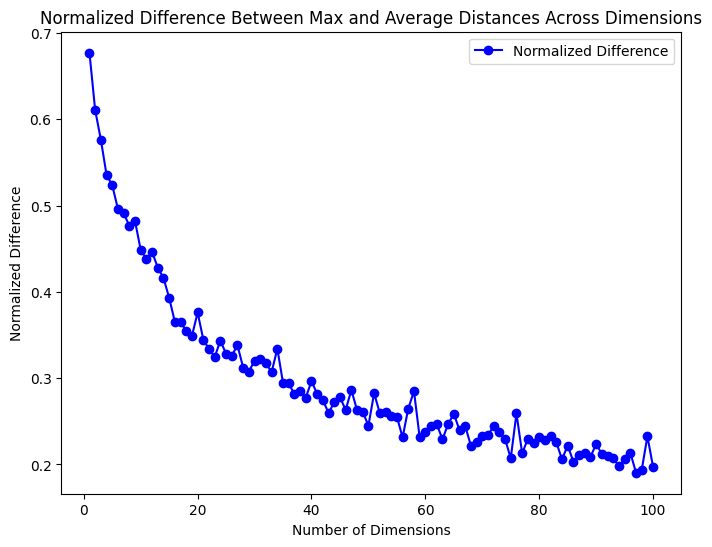

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist

def generate_points(dimensions, num_points, range_min, range_max):
    return np.random.uniform(range_min, range_max, (num_points, dimensions))

def calculate_distances_stats(points):
    # Compute pairwise distances
    distances = pdist(points)

    # Calculate average and maximum distance
    average_distance = np.mean(distances)
    max_distance = np.max(distances)

    return average_distance, max_distance
def plot_normalized_difference(num_points, dimensions_range, range_min, range_max):
    normalized_differences = []

    for dim in dimensions_range:
        points = generate_points(dim, num_points, range_min, range_max)
        average_distance, max_distance = calculate_distances_stats(points)
        normalized_difference = (max_distance - average_distance) / max_distance
        normalized_differences.append(normalized_difference)

    plt.figure(figsize=(8, 6))
    plt.plot(dimensions_range, normalized_differences, label='Normalized Difference', marker='o', color='blue')
    plt.xlabel('Number of Dimensions')
    plt.ylabel('Normalized Difference')
    plt.title('Normalized Difference Between Max and Average Distances Across Dimensions')
    plt.legend()
    plt.show()
plot_normalized_difference(500, range(1, 101), 0, 1)

The graph shows that as we go into higher dimensions, the average distance gets closer to the maximum distance. We used normalization in here to make sure the scales were accurate.

#**Law of Large Numbers (LLN)**

LLN statistical principle suggests that as we increase our sample size or the number of dimensions, the average of our observations gets closer to the expected value.

A crucial requirement for the LLN is the independence of random variables. In high-dimensional vectors, this independence might be shown through an interesting geometric property: the vectors tend to be almost orthogonal to each other.

In [ ]:
import numpy as np

def test_orthogonality(dimensions, n_trials):
    for i in range(n_trials):
        # Generate two random vectors
        v1 = np.random.randn(dimensions)
        v2 = np.random.randn(dimensions)

        # Calculate dot product
        dot_product = np.dot(v1, v2)

        # Calculate magnitudes
        magnitude_v1 = np.linalg.norm(v1)
        magnitude_v2 = np.linalg.norm(v2)

        # Calculate the cosine of the angle
        cos_theta = dot_product / (magnitude_v1 * magnitude_v2)

        # Check if vectors are almost orthogonal
        if np.abs(cos_theta) < 0.1:  # Adjust this threshold as needed
            orthogonality = "Almost Orthogonal"
        else:
            orthogonality = "Not Orthogonal"

        # Calculate angle in degrees
        theta = np.arccos(cos_theta) * (180 / np.pi)  # Convert to degrees

        print(f"Trial {i+1}:")
        print(f"  Dot Product: {dot_product}")
        print(f"  Cosine of Angle: {cos_theta}")
        print(f"  Angle: {theta} degrees")
        print(f"  Status: {orthogonality}")
        print("--------------------------------")

# Try to edit this and notice the near-orthogonality of vectors in higher dimensions
dimensions = 100  # Number of dimensions
n_trials = 10     # Number of trials

test_orthogonality(dimensions, n_trials)

Trial 1:
  Dot Product: 7.3796991691175995
  Cosine of Angle: 0.06984833918610427
  Angle: 85.99472362795957 degrees
  Status: Almost Orthogonal
--------------------------------
Trial 2:
  Dot Product: -32.49053932472435
  Cosine of Angle: -0.29473751779799207
  Angle: 107.1417984621252 degrees
  Status: Not Orthogonal
--------------------------------
Trial 3:
  Dot Product: 5.607100476003733
  Cosine of Angle: 0.0553412684545835
  Angle: 86.82755812755458 degrees
  Status: Almost Orthogonal
--------------------------------
Trial 4:
  Dot Product: 8.58349266211791
  Cosine of Angle: 0.08702419818355672
  Angle: 85.00756569457958 degrees
  Status: Almost Orthogonal
--------------------------------
Trial 5:
  Dot Product: -0.7483607712584155
  Cosine of Angle: -0.00707671318847577
  Angle: 90.40546918287956 degrees
  Status: Almost Orthogonal
--------------------------------
Trial 6:
  Dot Product: 13.109059984398806
  Cosine of Angle: 0.124425281226968
  Angle: 82.85243228154417 degrees